Data Postprocessing - CPU Usage
==============

**Authors:** Sergio A. Dorado-Rojas (sergio.dorado.rojas@gmail.com), Manuel Navarro Catalan (manosnavarro@gmail.com), Marcelo de Castro Fernandes (decasm3@rpi.edu) and Luigi Vanfretti (luigi.vanfretti@gmail.com)

Firstly, we import the libraries required to make the plots.

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import copy
from plot_cpu_usage import*

Nextly, we read the pickle files containing the simulation results.

In [2]:
# ======================================================
# IMPORTING DATA
# ======================================================

measurements = {'initialization': None,
                'line_opening': None,
                'bus_faults' : None}

# Sequential execution
with open('measurements_initialization.pkl', 'rb') as f:
    measurements['initialization'] = pickle.load(f)

# Multithreading execution
with open('measurements_line_opening.pkl', 'rb') as f:
    measurements['line_opening'] = pickle.load(f)
    
# Multiprocessing execution
with open('measurements_bus_faults.pkl', 'rb') as f:
    measurements['bus_faults'] = pickle.load(f)

## Execution Time Data

The execution time data measures both the model compilation and integration (simulation) time.

In [3]:
for experiment in measurements: 
    solvers = list(measurements[experiment].keys())
    print("{t:=^30}".format(t=""))
    print('{}'.format(experiment))
    print("{t:=^30}".format(t=""))
    for solver in solvers:
        tools = list(measurements[experiment][solver].keys())
        for tool in tools:
            print("Tool: {}\nSolver: {}\nExecution Time: {} s - {} min\n".format(tool, solver, measurements[experiment][solver][tool]['execution_time'], measurements[experiment][solver][tool]['execution_time']/60))

initialization
Tool: Dymola
Solver: dassl
Execution Time: 20.352479219436646 s - 0.3392079869906108 min

Tool: OpenModelica
Solver: dassl
Execution Time: 19.34515953063965 s - 0.3224193255106608 min

Tool: Dymola
Solver: euler
Execution Time: 1904.7908816337585 s - 31.746514693895975 min

Tool: OpenModelica
Solver: euler
Execution Time: 289.28784251213074 s - 4.821464041868846 min

Tool: Dymola
Solver: trapezoid
Execution Time: 3162.209146499634 s - 52.703485774993894 min

Tool: OpenModelica
Solver: trapezoid
Execution Time: 301.2737555503845 s - 5.021229259173075 min

Tool: Dymola
Solver: rungekutta
Execution Time: 4441.251438856125 s - 74.02085731426875 min

Tool: OpenModelica
Solver: rungekutta
Execution Time: 794.6805436611176 s - 13.244675727685292 min

line_opening
Tool: Dymola
Solver: dassl
Execution Time: 20.57722783088684 s - 0.34295379718144736 min

Tool: OpenModelica
Solver: dassl
Execution Time: 25.254234313964844 s - 0.4209039052327474 min

Tool: Dymola
Solver: euler
Execu

## CPU Usage

In [4]:
# Instantiating dictionary of Pandas dataframes
df_cpu = {'Dymola' : {'initialization' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None} ,
                      'line_opening' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                      'bus_faults': {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None}},
         'OpenModelica' : {'initialization' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                           'line_opening' : {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None},
                           'bus_faults': {'dassl' : None, 'euler' : None, 'trapezoid' : None, 'rungekutta' :  None}}}

# Iterating through measurements
for experiment in measurements:
    
    # Iterating through solvers
    for solver in list(measurements[experiment].keys()):
        # Iterating through tools
        for tool in list(measurements[experiment][solver].keys()):
            
            # Number of cores
            n_cores = len(measurements[experiment][solver][tool]['cpu_use'][0])
            #print(n_cores)
            
            # Number of data points
            n_data_points = len(measurements[experiment][solver][tool]['cpu_use'])
            #print(n_data_points)       
            
            cpu_usage = {1 : [],
                        2 : [],
                        3 : [],
                       4 : [],
                       5 : [],
                       6 : [],
                       7 : [],
                       8 : [],
                       9 : [],
                       10 : [],
                       11 : [],
                       12 : []}
            
            for data_point in range(n_data_points):
                for core in range(n_cores):
                    cpu_usage[core + 1].append(measurements[experiment][solver][tool]['cpu_use'][data_point][core])
                    
            # Creating temporary dataframe
            df_temp = pd.DataFrame([], columns = range(1, n_cores + 1))
            
            # Populating dataframe
            for core in list(cpu_usage.keys()):
                df_temp[core] = cpu_usage[core]
            
            # Adding time in seconds
            df_temp["Time"] = 0.2*np.arange(0, len(cpu_usage[1]))
            
            df_cpu[tool][experiment][solver] = df_temp
            
            # Cleaning temporary dataframe
            df_temp = None

/home/dorads/Documents/Google_Drive/03_Papers/01_Conference_Papers/04_2019_AmericanModelicaConference_II/05_SimulationCode/Time-Domain-Simulation-Performance-Benchmark/plot_cpu_usage.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(figsize = (10,10), nrows = 4, ncols = 3)


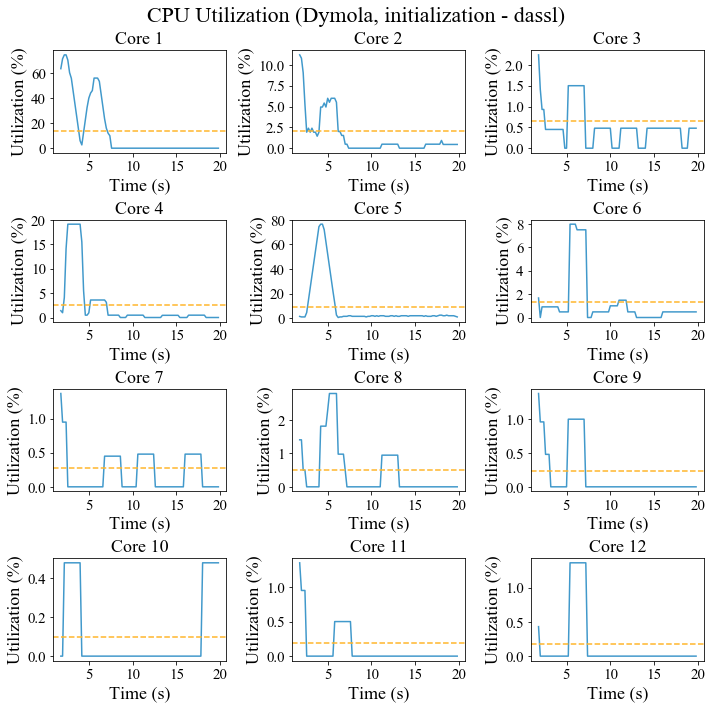

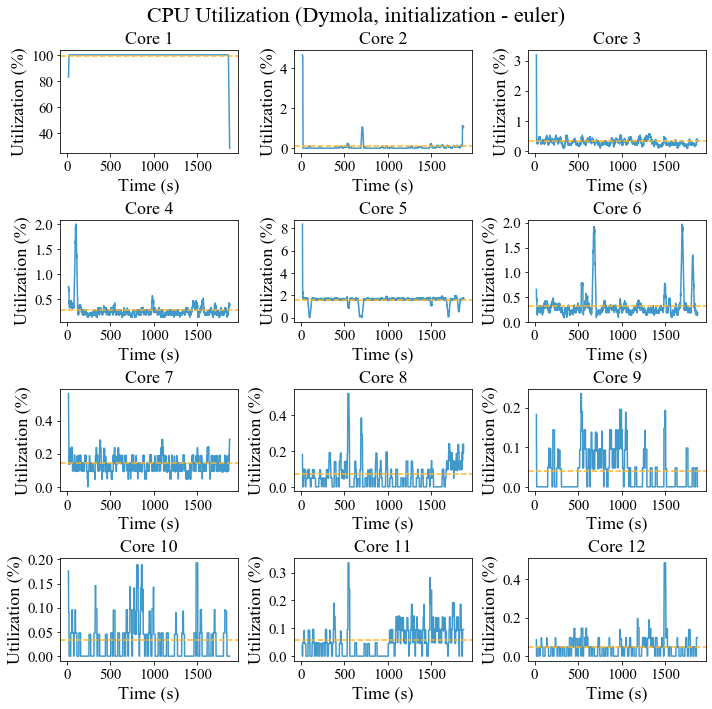

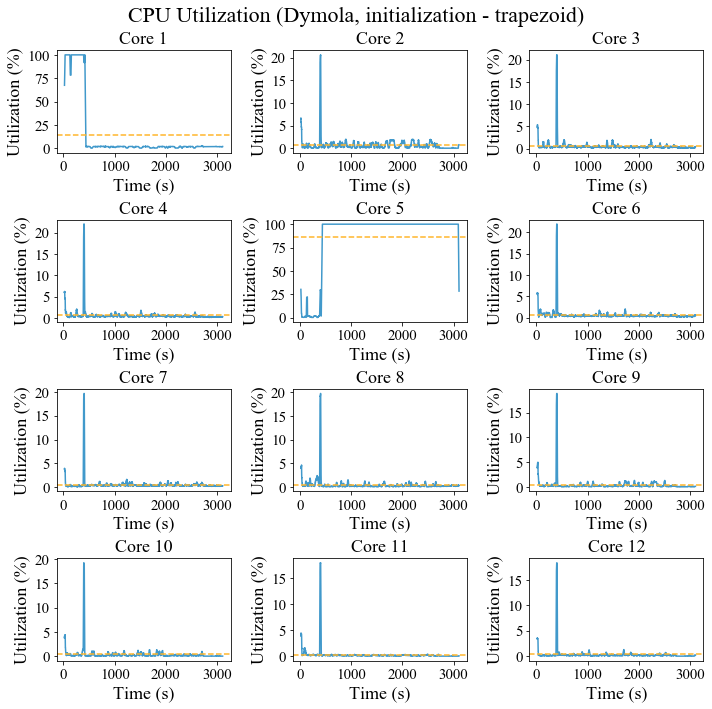

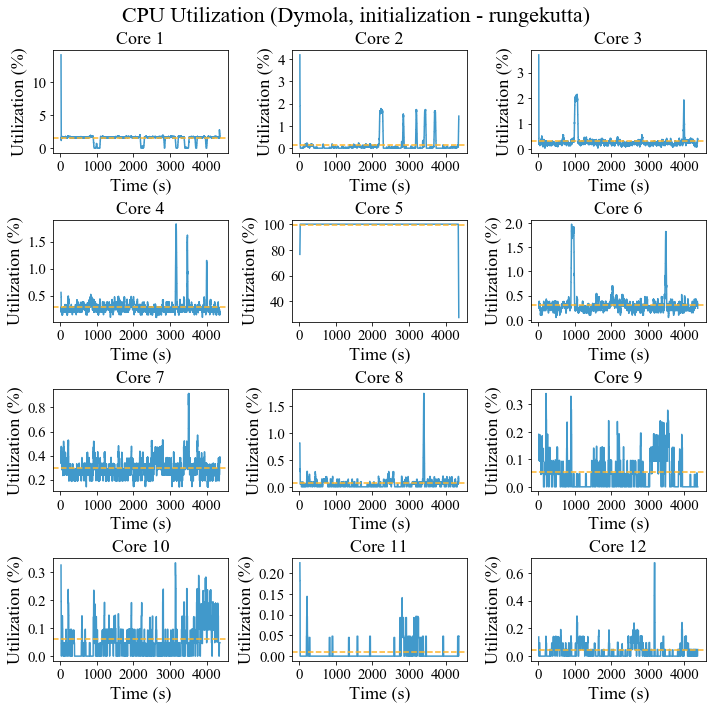

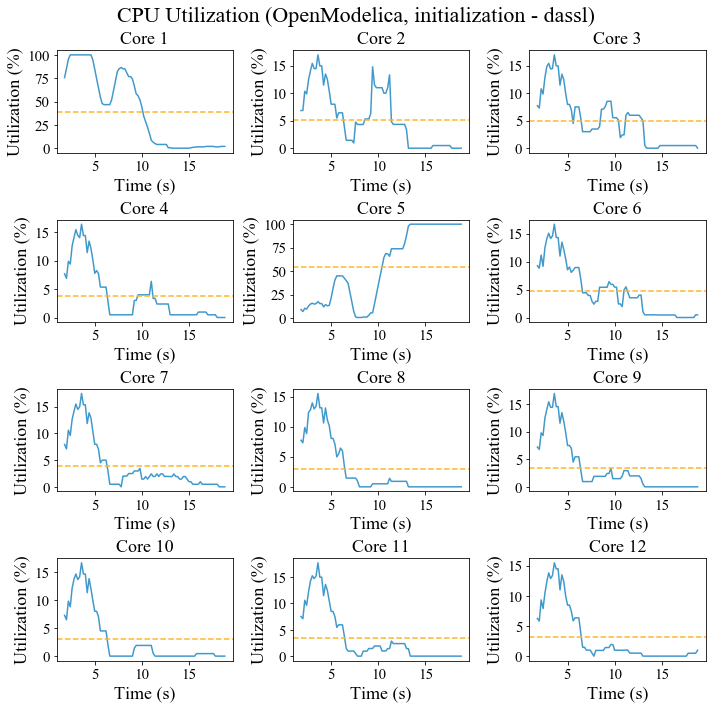

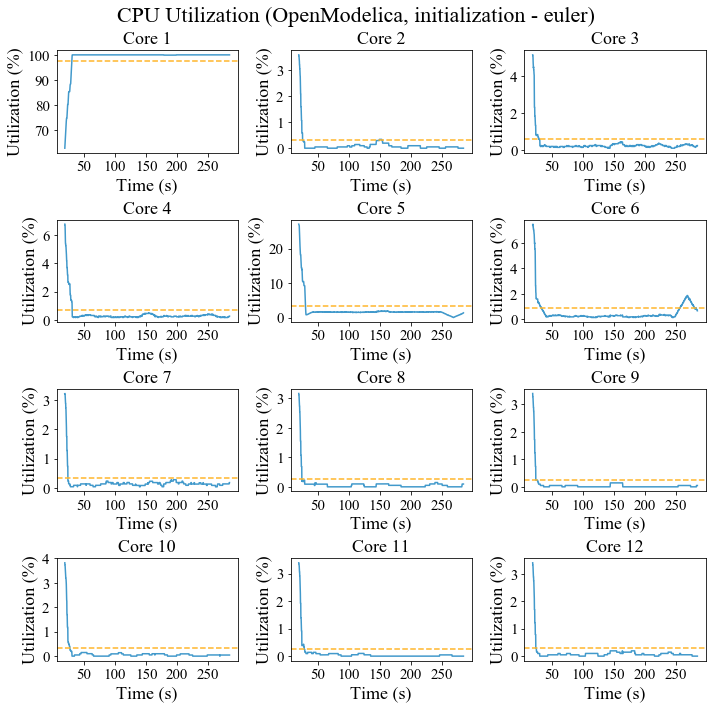

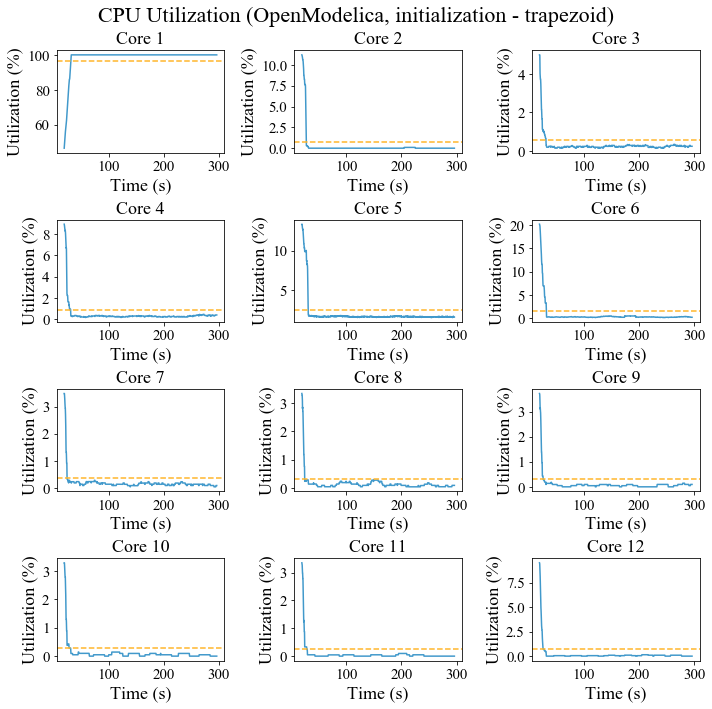

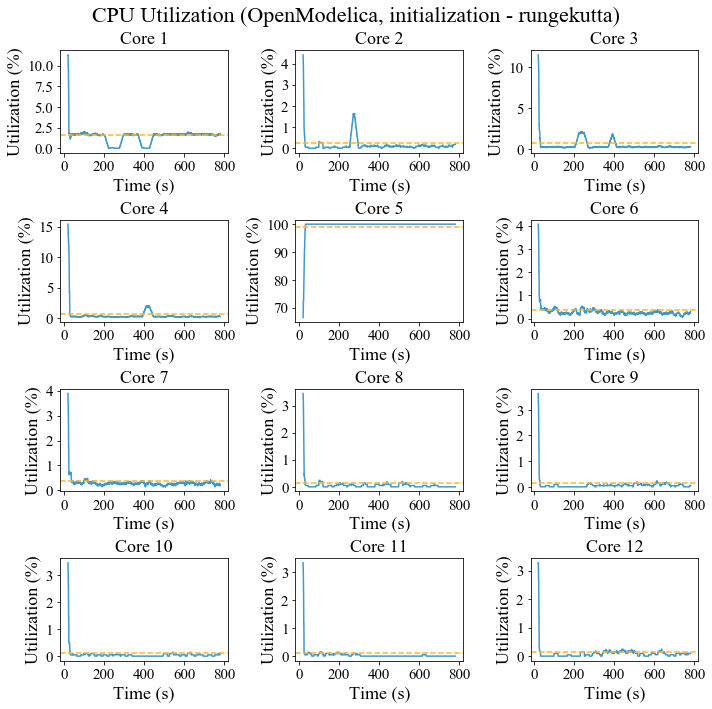

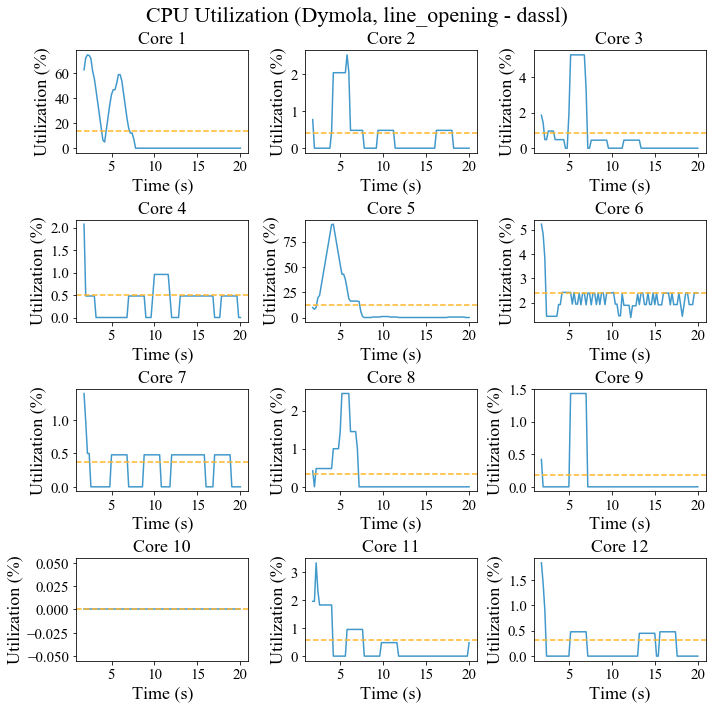

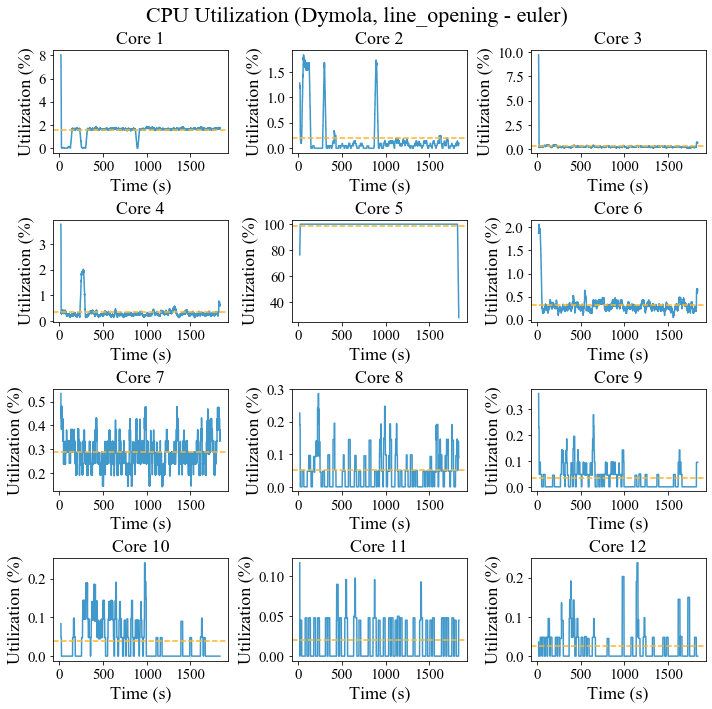

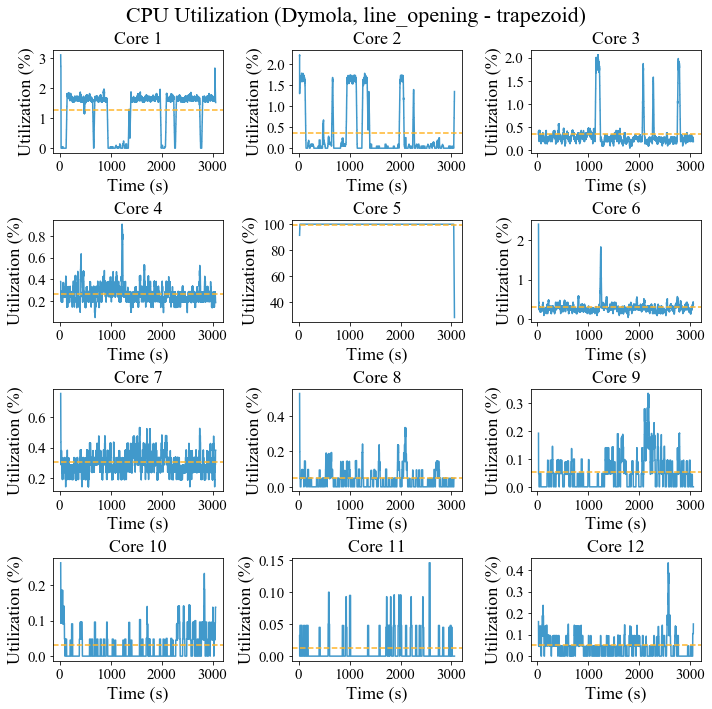

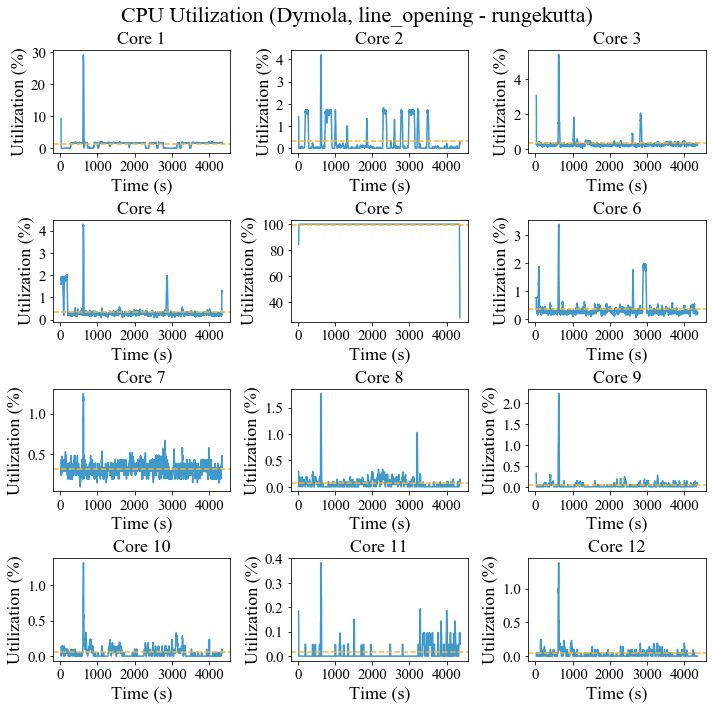

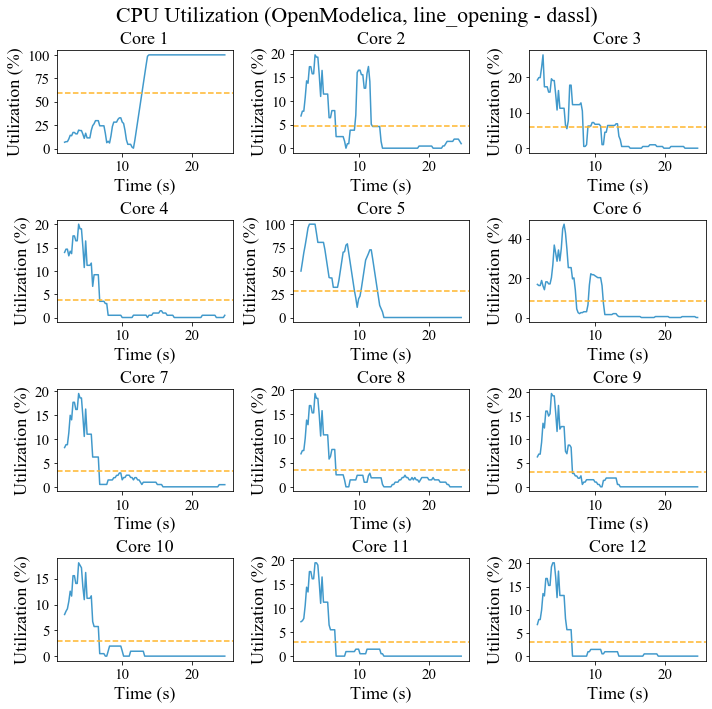

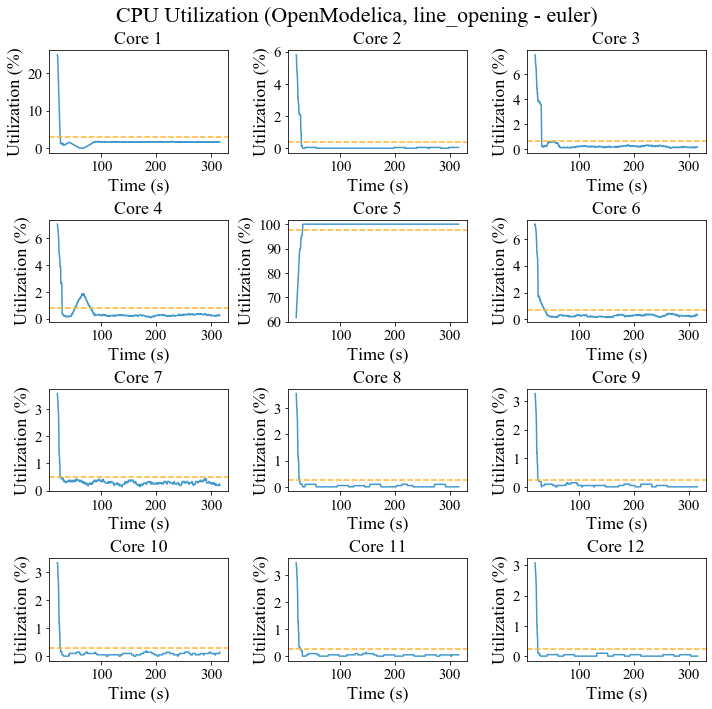

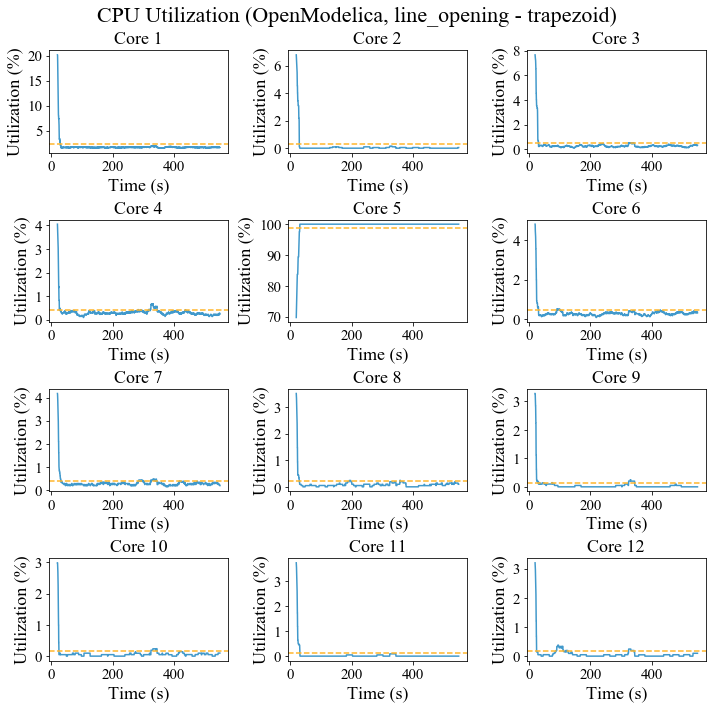

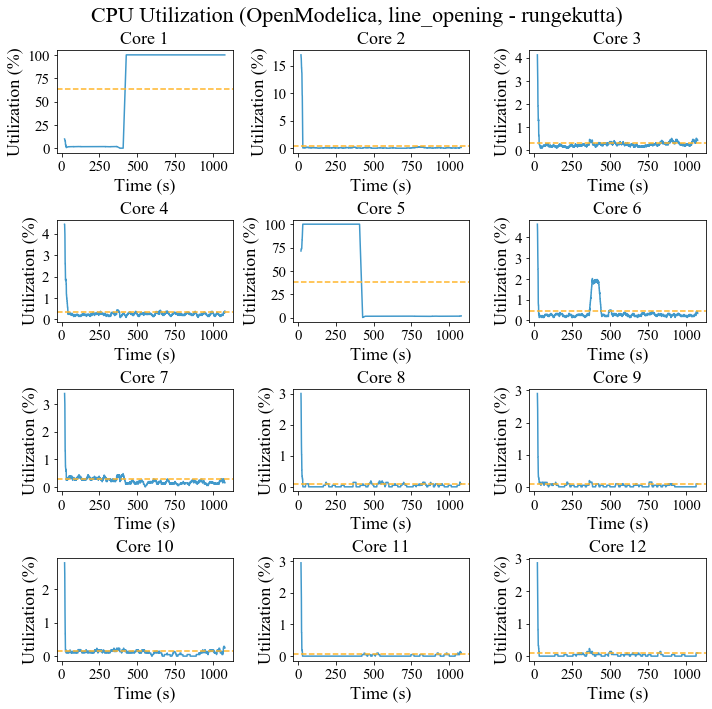

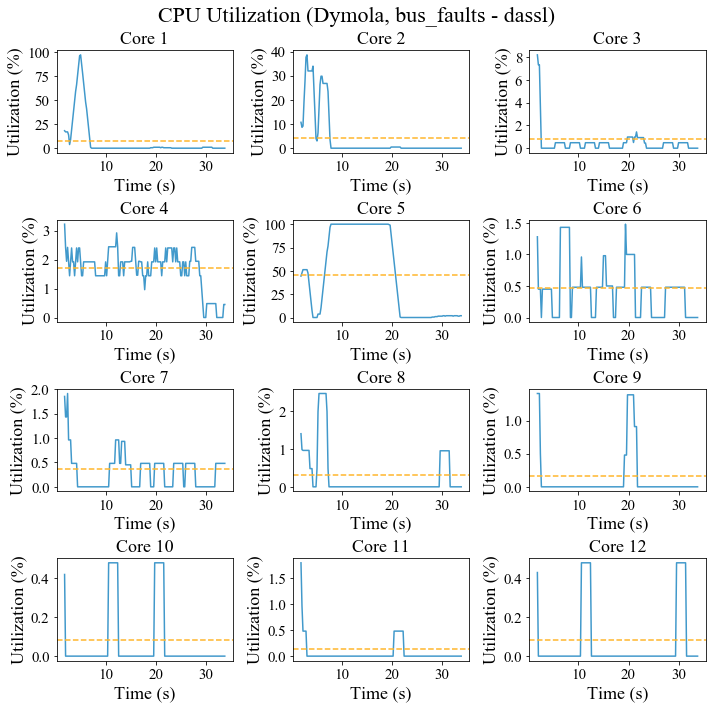

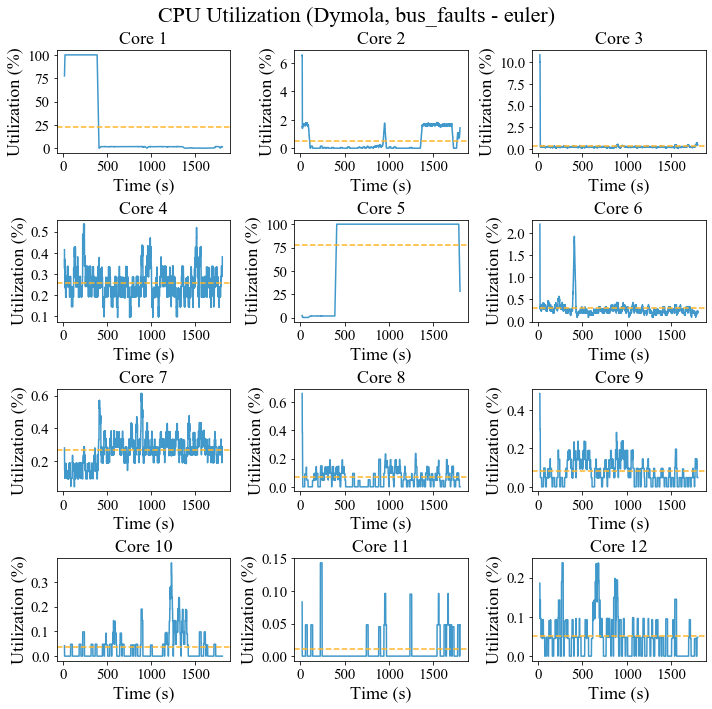

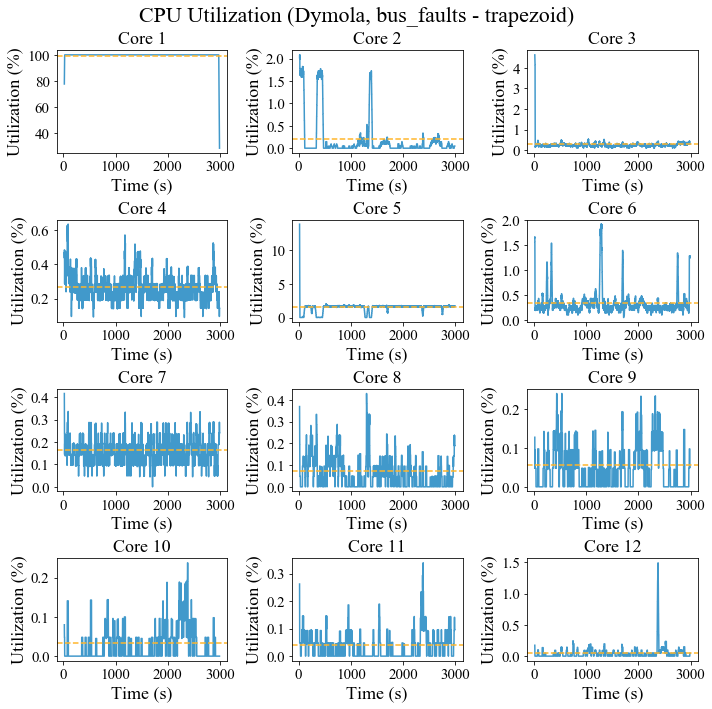

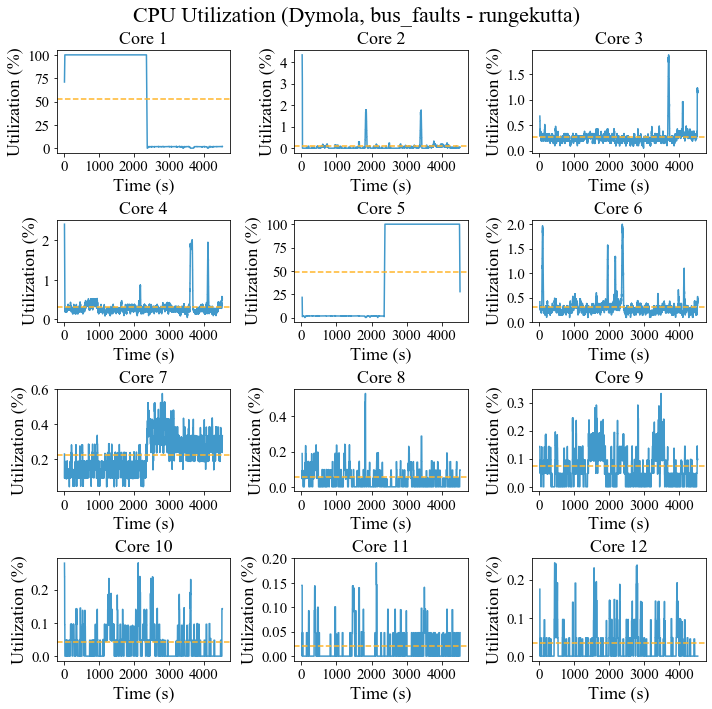

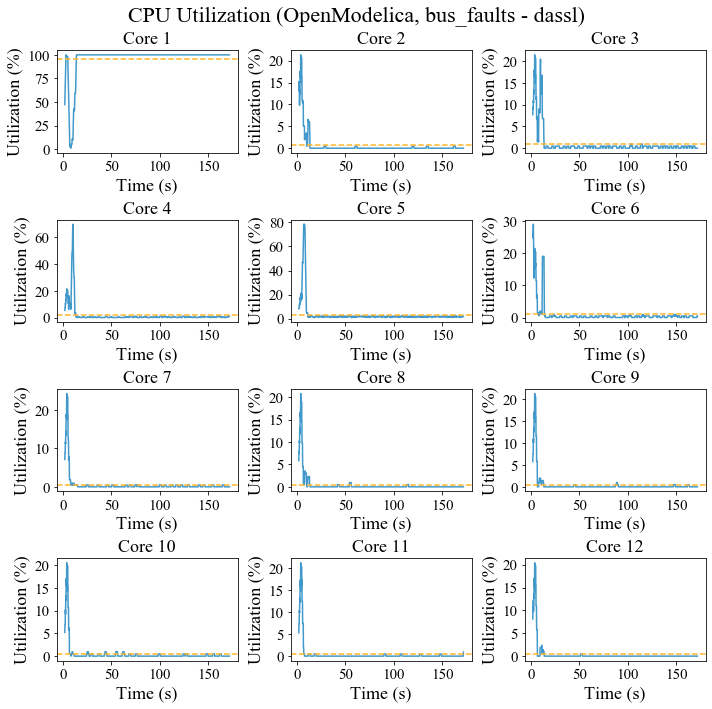

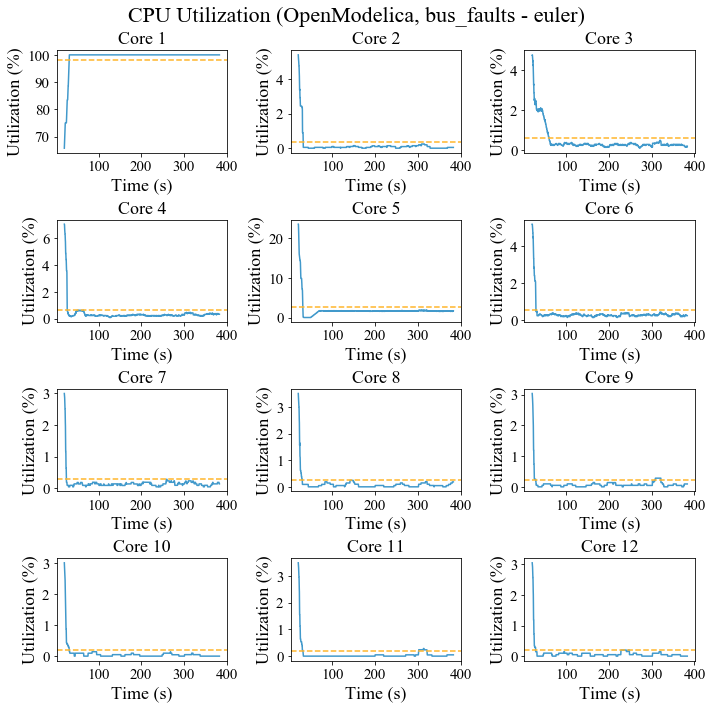

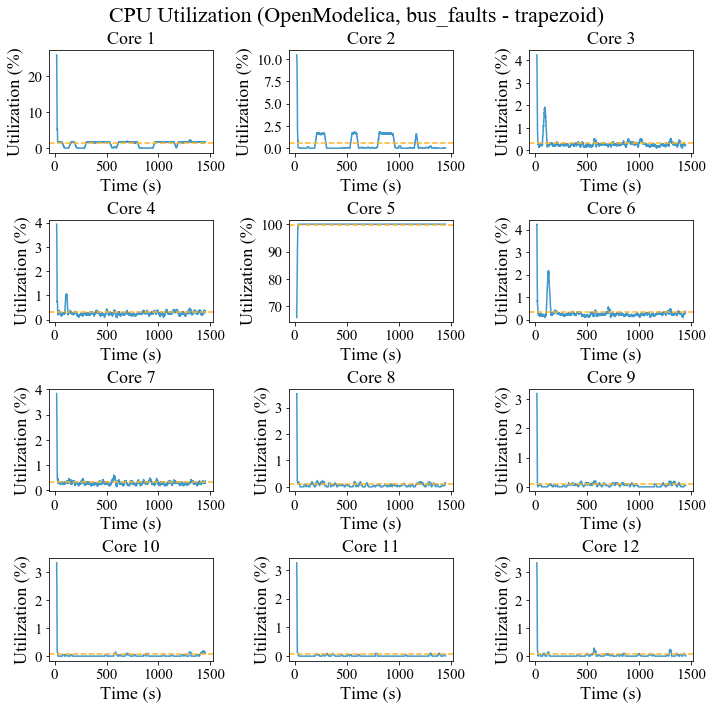

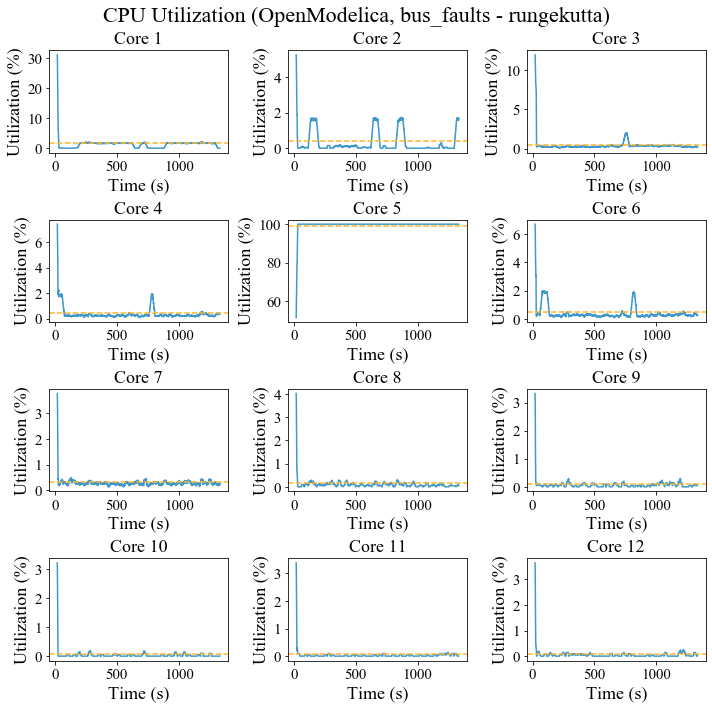

In [5]:
n_plot = 1

for experiment in measurements:
    for tool in tools:
        for solver in solvers:
            fig_name = "Fig{r:02d}_CPU_Utilization_{t}_{e}_{s}".format(r = n_plot, t = tool, e = experiment, s = solver)
            plot_cpu_usage(df_cpu, tool, experiment, solver, fig_name)
            n_plot += 1